In [61]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [62]:
# Load the image and convert it to RGB format
image_path = './image2.png'
image = Image.open(image_path).convert("RGB")
image_array = np.array(image)
original_shape = image_array.shape

# Reshape the image array to a 2D array where each row is a pixel (R, G, B)
pixels = image_array.reshape(-1, 3)

In [63]:
# Apply GMM with covariance_type
gmm = GaussianMixture(n_components=5, covariance_type='diag', random_state=42)
gmm.fit(pixels)

# Get the responsibilities for each pixel
responsibilities = gmm.predict_proba(pixels)
responsibilities

# For each pixel, find the highest responsibility
max_responsibility_clusters = np.argmax(responsibilities, axis=1)

# Get the mean colors (cluster centers) for each cluster
cluster_centers = gmm.means_

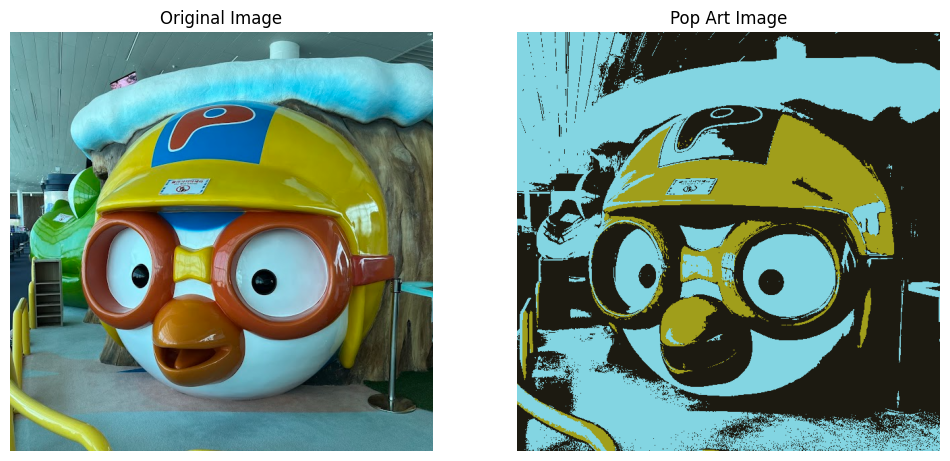

In [64]:
# Recreate the image using the mean colors for each cluster
pop_art_pixels = cluster_centers[max_responsibility_clusters].astype(np.uint8)
pop_art_image_array = pop_art_pixels.reshape(original_shape)

# Convert the array back to an image
pop_art_image = Image.fromarray(pop_art_image_array)

# Display the original and Pop Art images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Pop Art Image")
plt.imshow(pop_art_image)
plt.axis("off")

plt.show()